## Análisis de datos - Clase 3

### Taller práctico - análisis completo de un dataset

En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

1. Importamos los datasets

In [60]:
# Dataset de carreras del 2024
carreras_24 = pd.read_csv('../datasets/f1_2024_R.csv')

# Dataset de qualifications del 2024
qualis_24 = pd.read_csv('../datasets/f1_2024_Q.csv')

# Dataset de sprints del 2024
sprints_24 = pd.read_csv('../datasets/f1_2024_S.csv')

### EDA (Exploratory Data Analysis)


#### Dimensiones

In [61]:
carreras_24.shape, qualis_24.shape, sprints_24.shape

((26606, 40), (7590, 40), (2418, 40))

#### Columnas y tipos de datos

In [62]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              26606 non-null  object 
 1   DriverNumber        26606 non-null  int64  
 2   LapTime             26381 non-null  float64
 3   LapNumber           26606 non-null  float64
 4   Stint               26606 non-null  float64
 5   PitOutTime          840 non-null    object 
 6   PitInTime           849 non-null    object 
 7   Sector1Time         26066 non-null  float64
 8   Sector2Time         26574 non-null  float64
 9   Sector3Time         26553 non-null  float64
 10  Sector1SessionTime  26008 non-null  object 
 11  Sector2SessionTime  26574 non-null  object 
 12  Sector3SessionTime  26553 non-null  object 
 13  SpeedI1             22460 non-null  float64
 14  SpeedI2             26552 non-null  float64
 15  SpeedFL             25728 non-null  float64
 16  Spee

In [63]:
qualis_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              7590 non-null   object 
 1   DriverNumber        7590 non-null   int64  
 2   LapTime             5101 non-null   float64
 3   LapNumber           7590 non-null   float64
 4   Stint               7590 non-null   float64
 5   PitOutTime          2249 non-null   object 
 6   PitInTime           2240 non-null   object 
 7   Sector1Time         5677 non-null   float64
 8   Sector2Time         7481 non-null   float64
 9   Sector3Time         7071 non-null   float64
 10  Sector1SessionTime  5677 non-null   object 
 11  Sector2SessionTime  7481 non-null   object 
 12  Sector3SessionTime  7071 non-null   object 
 13  SpeedI1             7512 non-null   float64
 14  SpeedI2             7479 non-null   float64
 15  SpeedFL             5350 non-null   float64
 16  SpeedS

In [64]:
sprints_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              2418 non-null   object 
 1   DriverNumber        2418 non-null   int64  
 2   LapTime             2274 non-null   float64
 3   LapNumber           2418 non-null   float64
 4   Stint               2406 non-null   float64
 5   PitOutTime          48 non-null     object 
 6   PitInTime           42 non-null     object 
 7   Sector1Time         2297 non-null   float64
 8   Sector2Time         2416 non-null   float64
 9   Sector3Time         2416 non-null   float64
 10  Sector1SessionTime  2293 non-null   object 
 11  Sector2SessionTime  2416 non-null   object 
 12  Sector3SessionTime  2416 non-null   object 
 13  SpeedI1             2136 non-null   float64
 14  SpeedI2             2416 non-null   float64
 15  SpeedFL             2374 non-null   float64
 16  SpeedS

In [65]:
carreras_24.columns

Index(['Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'SessionType',
       'EventDate', 'Time_weather', 'AirTemp', 'TrackTemp', 'Humidity',
       'AvgSpeed', 'MaxThrottle', 'AvgBrake'],
      dtype='object')

#### Vista general del dataset

In [66]:
carreras_24.head(10)

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,EventName,SessionType,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,AvgSpeed,MaxThrottle,AvgBrake
0,VER,1,97.284,1.0,1.0,NaN,NaN,NaN,41.266,23.616,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
1,LEC,16,98.271,1.0,1.0,NaN,NaN,NaN,41.549,23.635,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
2,RUS,63,99.228,1.0,1.0,NaN,NaN,NaN,42.099,23.694,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
3,NOR,4,102.168,1.0,1.0,NaN,NaN,NaN,43.309,24.244,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
4,HAM,44,103.122,1.0,1.0,NaN,NaN,NaN,43.609,24.393,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
5,PIA,81,102.523,1.0,1.0,NaN,NaN,NaN,43.573,24.140,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
6,ALO,14,101.679,1.0,1.0,NaN,NaN,NaN,43.268,24.162,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
7,SAR,2,105.921,1.0,1.0,NaN,NaN,NaN,43.162,24.178,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
8,SAI,55,100.620,1.0,1.0,NaN,NaN,NaN,42.861,23.765,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN
9,ZHO,24,104.801,1.0,1.0,NaN,NaN,NaN,43.576,24.294,...,Bahrain Grand Prix,R,2024-03-02,3614.115,18.2,23.8,49.0,NaN,NaN,NaN


#### Variables numéricas: estadística descriptiva

In [67]:
carreras_24.describe()

,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,...,LapStartTime,TrackStatus,Position,Time_weather,AirTemp,TrackTemp,Humidity,AvgSpeed,MaxThrottle,AvgBrake
count,26606.000000,26381.000000,26606.000000,26606.000000,26066.000000,26574.000000,26553.000000,22460.000000,26552.000000,25728.000000,...,26606.000000,26606.000000,26578.000000,26606.000000,26606.000000,26606.000000,26606.000000,0.0,0.0,0.0
mean,28.991393,92.727333,30.507931,1.992934,28.544514,35.105664,27.942290,254.994167,247.649292,268.093711,...,6191.722126,7.034090,9.793325,6191.860156,23.490434,35.588191,54.358303,NaN,NaN,NaN
std,23.849732,60.498621,18.260169,0.872187,6.928019,7.506386,7.434872,45.269851,43.887292,34.744874,...,1929.832188,66.696792,5.430816,1929.959971,4.789366,9.032689,13.877374,NaN,NaN,NaN
min,1.000000,67.694000,1.000000,1.000000,16.897000,17.488000,17.690000,59.000000,57.000000,1.000000,...,245.608000,1.000000,1.000000,246.621000,14.500000,16.700000,30.000000,NaN,NaN,NaN
25%,11.000000,81.964000,15.000000,1.000000,25.398250,29.584000,23.076000,214.000000,211.000000,248.000000,...,4707.357750,1.000000,5.000000,4703.094000,19.200000,28.700000,45.000000,NaN,NaN,NaN
50%,22.000000,89.076000,30.000000,2.000000,28.470000,32.958000,25.949000,273.000000,257.000000,275.000000,...,6136.312500,1.000000,10.000000,6134.155000,22.000000,37.000000,53.000000,NaN,NaN,NaN
75%,44.000000,98.704000,45.000000,3.000000,31.086000,41.288000,31.986000,289.000000,280.000000,291.000000,...,7584.237750,1.000000,14.000000,7581.674000,28.300000,43.500000,63.000000,NaN,NaN,NaN
max,81.000000,2526.253000,78.000000,5.000000,97.585000,90.308000,97.241000,357.000000,343.000000,357.000000,...,11925.420000,2671.000000,20.000000,11903.549000,33.900000,51.700000,92.000000,NaN,NaN,NaN


#### Variables categóricas: exploración

In [ ]:
# Pilotos que corrieron en el 2024
carreras_24['Driver'].unique()

array(['VER', 'LEC', 'RUS', 'NOR', 'HAM', 'PIA', 'ALO', 'SAR', 'SAI',
       'ZHO', 'RIC', 'TSU', 'ALB', 'HUL', 'OCO', 'GAS', 'BOT', 'MAG',
       'PER', 'STR', 'BEA', 'COL', 'LAW', 'DOO'], dtype=object)

In [ ]:
# Constructores que participaron en el 2024
carreras_24['Team'].unique()

array(['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren',
       'Aston Martin', 'Williams', 'Kick Sauber', 'RB', 'Haas F1 Team',
       'Alpine'], dtype=object)

In [ ]:
# ¿En cuántos equipos estuvo cada piloto?
teams = carreras_24.groupby('Driver')['Team'].nunique().reset_index()

teams

,Driver,Team
0,ALB,1
1,ALO,1
2,BEA,2
3,BOT,1
4,COL,1
5,DOO,1
6,GAS,1
7,HAM,1
8,HUL,1
9,LAW,1


In [274]:
# Pilotos por equipo
equipos = carreras_24[['Driver', 'Team']].drop_duplicates().sort_values(by='Team')

equipos.head(25)

,Driver,Team
25574,DOO,Alpine
15,GAS,Alpine
14,OCO,Alpine
6,ALO,Aston Martin
19,STR,Aston Martin
8,SAI,Ferrari
1136,BEA,Ferrari
1,LEC,Ferrari
18137,BEA,Haas F1 Team
13,HUL,Haas F1 Team


In [ ]:
# Grand Prix que se corrieron en el 2024
carreras_24['EventName'].unique()

array(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix',
       'Australian Grand Prix', 'Japanese Grand Prix',
       'Chinese Grand Prix', 'Miami Grand Prix',
       'Emilia Romagna Grand Prix', 'Monaco Grand Prix',
       'Canadian Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix',
       'British Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix',
       'Dutch Grand Prix', 'Italian Grand Prix', 'Azerbaijan Grand Prix',
       'Singapore Grand Prix', 'United States Grand Prix',
       'Mexico City Grand Prix', 'São Paulo Grand Prix',
       'Las Vegas Grand Prix', 'Qatar Grand Prix', 'Abu Dhabi Grand Prix'],
      dtype=object)

In [150]:
# Total de carreras en las que participó cada piloto

driver_events = carreras_24.groupby('Driver')['EventName'].nunique().reset_index()
driver_events = driver_events.sort_values(ascending=False, by='EventName')

driver_events


,Driver,EventName
12,NOR,24
10,LEC,24
22,VER,24
21,TSU,24
20,STR,24
17,RUS,24
15,PIA,24
14,PER,24
1,ALO,24
23,ZHO,24


### Visualización de datos

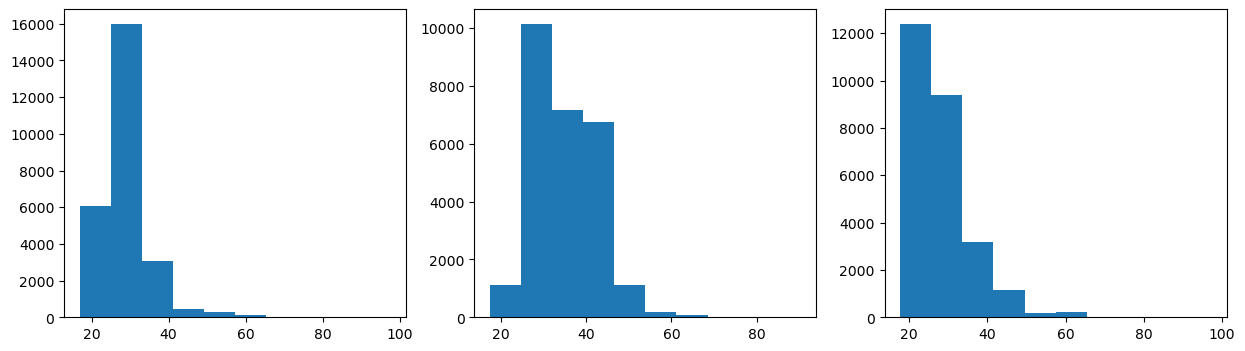

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(carreras_24['Sector1Time'])
ax[1].hist(carreras_24['Sector2Time'])
ax[2].hist(carreras_24['Sector3Time'])

plt.show()

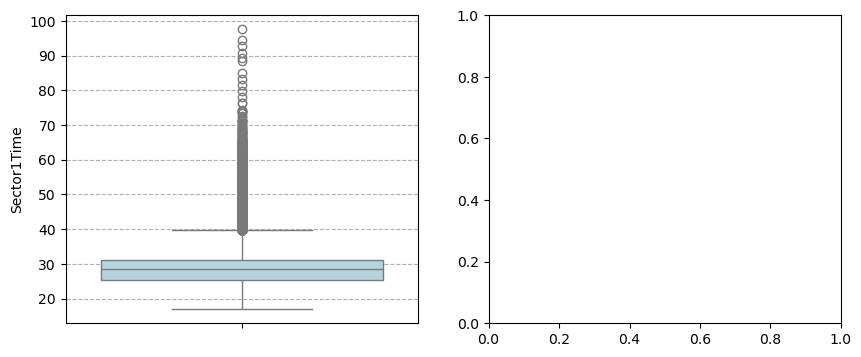

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=carreras_24, y='Sector1Time', color="lightblue", ax=ax[0])

ax[0].grid(axis='y', ls='--')

plt.show()

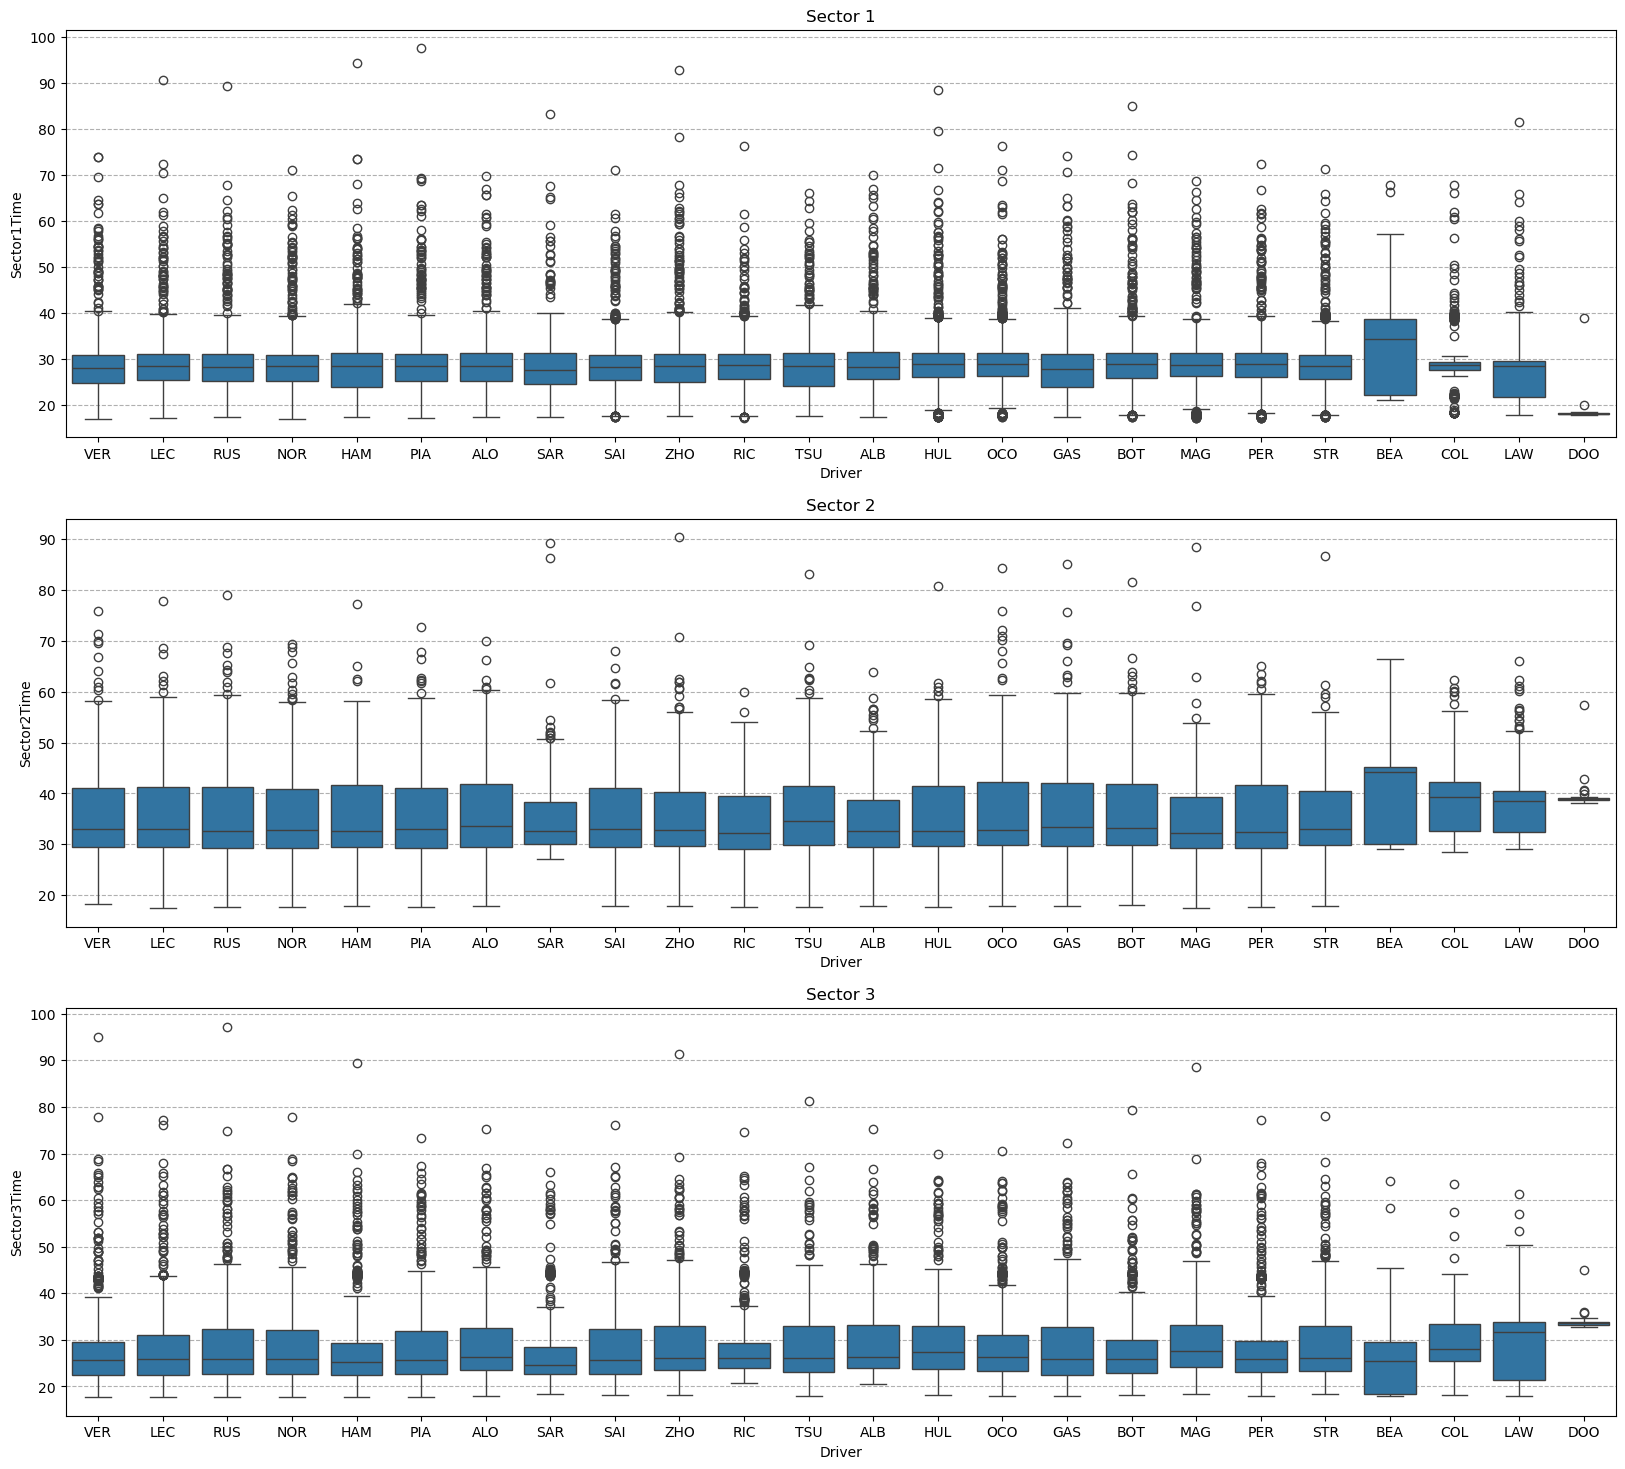

In [72]:
fig, ax = plt.subplots(3, 1,figsize=(20, 18))

sns.boxplot(data=carreras_24, y='Sector1Time', x='Driver', ax=ax[0])
sns.boxplot(data=carreras_24, y='Sector2Time', x='Driver', ax=ax[1])
sns.boxplot(data=carreras_24, y='Sector3Time', x='Driver', ax=ax[2])

for i in (0,1,2):
    ax[i].grid(axis='y', ls='--')
    ax[i].set_title(f'Sector {i+1}')

plt.show()

In [73]:
def scatter(driver, race='all'):
    if race == 'all':
        df = carreras_24[carreras_24['Driver']==driver]
    else:
        df = carreras_24[(carreras_24['Driver']==driver) & (carreras_24['EventName']==race)]

    plt.figure(figsize=(10, 5))
    plt.scatter(df['LapStartDate'], df['Sector1Time'], label='Sector 1', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector2Time'], label='Sector 2', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector3Time'], label='Sector 3', alpha=0.7)

    plt.xlabel('')
    plt.ylabel('Time')
    plt.title(f'Tiempos por sector - Piloto: {driver} - Carrera(s):{race}')
    plt.legend()
    plt.xticks(ticks=plt.xticks()[0], labels=[''] * len(plt.xticks()[0]))
    plt.show()

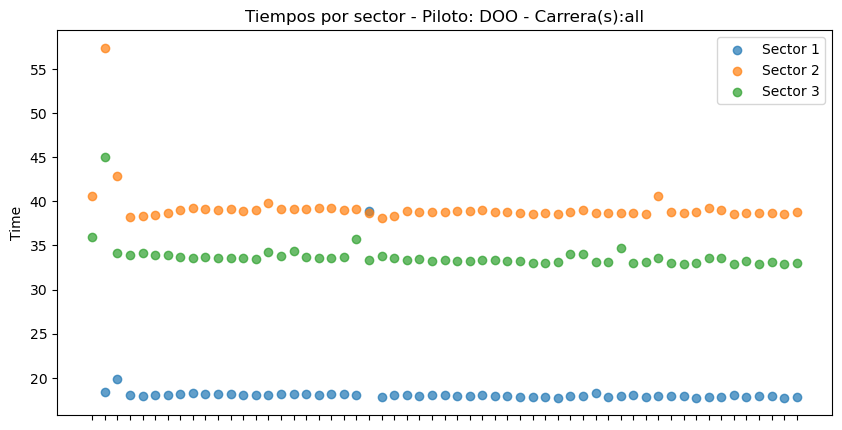

In [74]:
scatter('DOO')

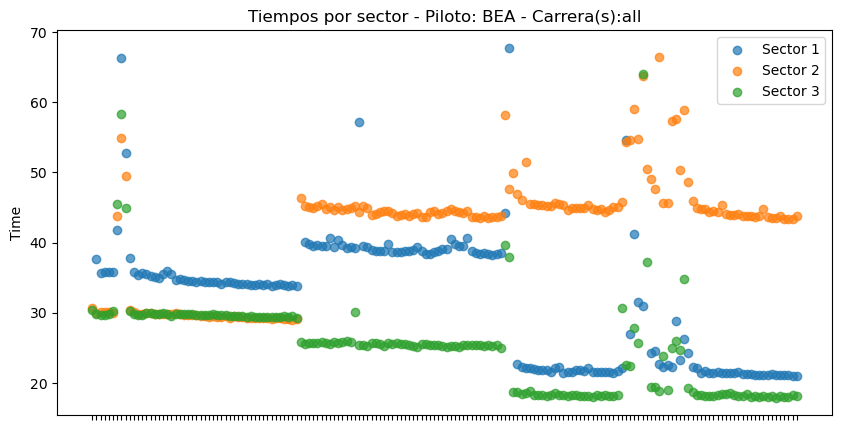

In [75]:
scatter('BEA')

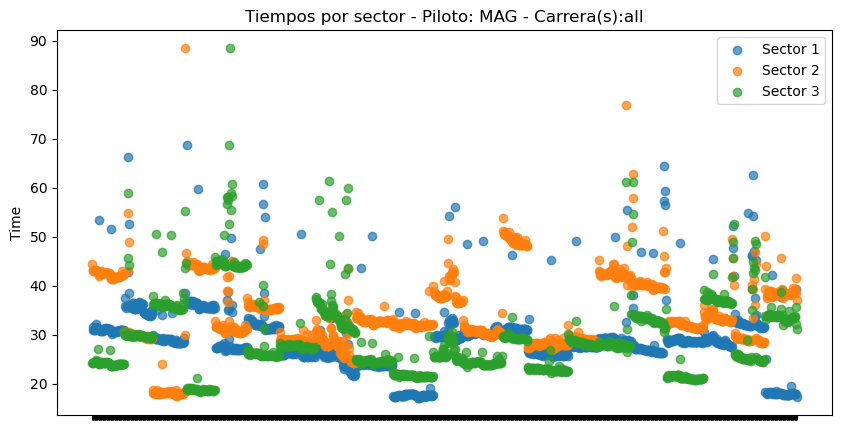

In [76]:
scatter('MAG')